# Identification
Please indicate your name

Student 1: Nguyen Huong Giang LE

Student 2: Dwi Prima Handayani Putri

# Practical work 2 : Fourier transform

This practial work is dedicated to the study of the discrete Fourier transform applied on the two following images:
![son.png](./img/son.png)
![sonrot.png](./img/sonrot.png)
and analyze the properties of their spectrum. To this end, we make use of the following functions provided by the module `numpy.fft`:

- `fft2()` to compute the Fourier transform on an image
- `fftshift()` to center the low frequencies
- `abs()` (from `numpy`) to compute the module of a complexe array

In most of cases, high frequencies have lower energy compare to low frequencies. We will use a logarithmic scale by applying $\log(1+abs(TF))$ to display the spectrum.

In [1]:
import numpy as np
from numpy.fft import fft2,fftshift
from PIL import Image

son = np.array(Image.open('img/son.png'))
sonrot = np.array(Image.open('img/sonrot.png'))

## Exercise: properties of Fourier transform applied on natural images
1. Write the following functions:
 - `computeFT(I)` returning the Fourier transform of image `I`,
 - `toVisualizeFT(If)` returning the centered module of a complex array `If` (the Fourier transform of an image),
 - `toVisualizeLogFT(If)` similar to the previous function but use a logarithmic scale.

In [2]:
import math
def computeFT(I):
    """ Array -> Array[complex] """
    return fft2(I)

def toVisualizeFT(If):
    """ Array[complex] -> Array[float] """
    return fftshift(If)

def toVisualizeLogFT(If):
    """ Array[complex] -> Array[float] """
    Y = fftshift(np.log10(1 + abs(If)))
    return Y


2. Write a series of instructions that
 - compute the Fourier transform of `son` and `sonrot`,
 - compute and display the module using a logarithmic scale,
 - threshold the module with a parameter of $1.10^5$ (use the function of TME1)
 - display the thresholded spectrum

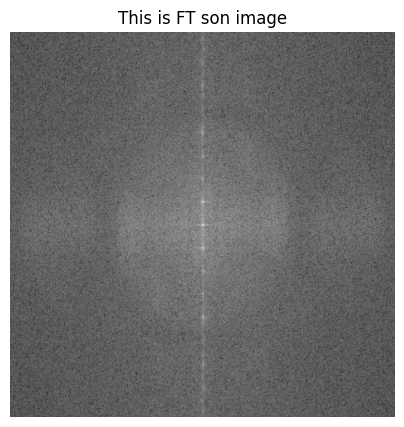

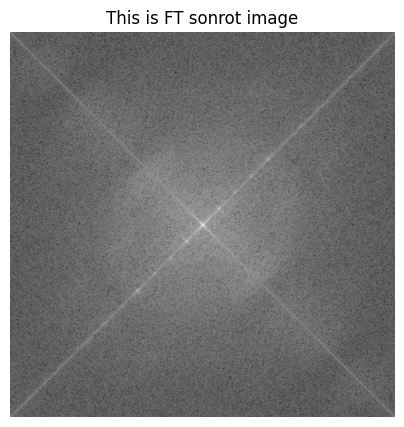

In [3]:
import matplotlib.pyplot as plt

# your code below

# comppute FT on son
sonFT = computeFT(son)
# compute FT on sonrot
sonrotFT = computeFT(sonrot)

# compute and display module using a logarithmic scale
sonLog = toVisualizeLogFT(sonFT)
sonrotLog = toVisualizeLogFT(sonrotFT)

# display sonFT using logarithmic scale
w,h=400,400
plt.figure(figsize=(w/80,h/80))
plt.gray()
plt.title('This is FT son image')
plt.axis('off')
plt.imshow(sonLog)
plt.show()

# display sonrotFT using logarithmic scale
w,h=400,400
plt.figure(figsize=(w/80,h/80))
plt.gray()
plt.title('This is FT sonrot image')
plt.axis('off')
plt.imshow(sonrotLog)
plt.show()

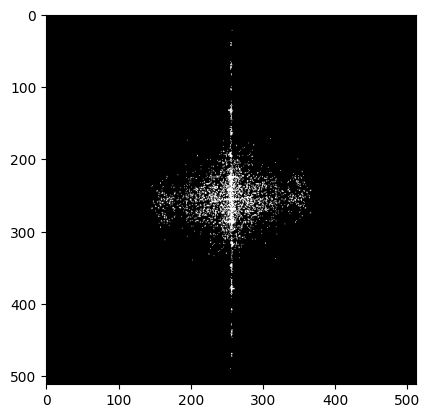

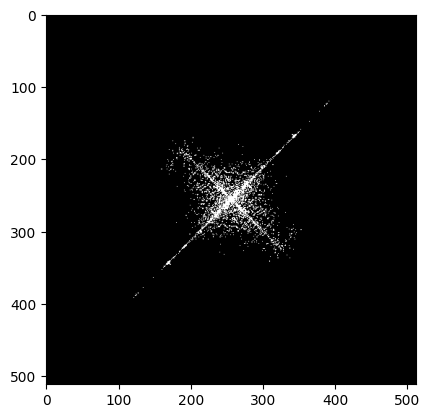

In [4]:
# threshold module with parameter of 10^5
def thresholdImage(I,s):
    """ Array*int -> Array """
    # replace pixel value to 0 if it lower than s
    # else replace it with 255
    K = np.where(I<s, 0,255)
    return K

# compute threshold FT module
sonThreshold = thresholdImage(sonLog,5)

sonrotThreshold = thresholdImage(sonrotLog,5)

# display threshold spectrum
plt.gray()
plt.imshow(sonThreshold)
plt.show()

plt.gray()
plt.imshow(sonrotThreshold)
plt.show()

3. Interpretation: discuss the results obtained on thresholded FT module. What property of the Fourier transform is shown ?

Answer:
First Image : the thresholded image highlights the central region of the image, which indicates that the most high-frequency information is concentrated near the origin of the frequency domain.

Second Image: the thresholded image shows a symmetric pattern, with high-frequency components spread diagonally.

Property of the Fourier Transform shown is rotation. 


4. Write the function `blend()` getting two images, one float parameter $\alpha\in[0,1]$, calculating $\alpha I_1+(1-\alpha)I_2$ and returning the result. 

In [5]:
def blend(I1,I2,alpha):
    """ Array**2*float -> Array """
    return alpha * I1 + (1-alpha) * I2

5. Apply the previous function on images `son` and `sonrot` and $\alpha=\frac12$, compute the Fourier transform, threshold the module and visualize the result. 

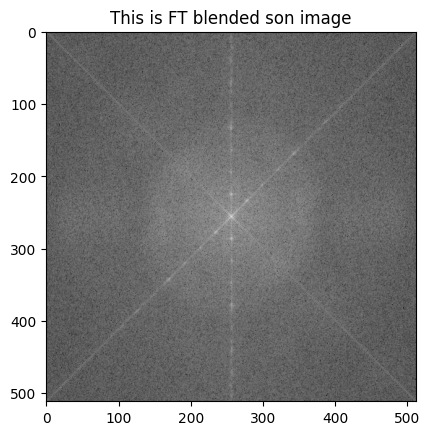

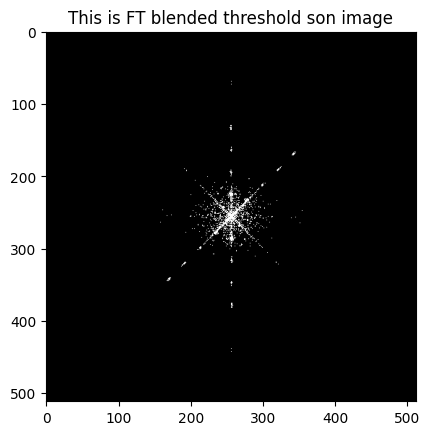

In [6]:
alpha = 0.5
newson = blend(son,sonrot, alpha)
newsonFT = computeFT(newson)
blendedFT = toVisualizeLogFT(newsonFT)


# display blended image
plt.gray()
plt.title('This is FT blended son image')
plt.imshow(blendedFT)
plt.show()

# threshold 
blendedFTThreshold = thresholdImage(blendedFT, 5)
# display blended image
plt.gray()
plt.title('This is FT blended threshold son image')
plt.imshow(blendedFTThreshold)
plt.show()

6. Compare the latter result with those of question 2: what property of the Fourier transform is shown? What is the behaviour of $\alpha$ in the resulting spectrum?

Answer: 

Property of the FT shown is Linearity, which demonstrates that it is a combination of the FT's of the two original images.

The behaviour of α help to controls the relative influence of the frequency components from the two images in resulting the spectrum.

7. We want to determine the text orientation in image `sonrot` and produce a new image with horizontal text. Write the function `rectifyOrientation()` that:

 + computes the FT module of image given in parameter and threshold it at $3\times 10^{5}$,
 + from thresholded module determines the main orientation using the function `mainOrientation()` 
 + produces the rectified image applying a rotation with a suitable angle using `rotateImage()`

In [7]:
def mainOrientation(I):
    """ Array -> tuple[Iori,float]
        return image of orientation (32 bins) and the main orientation (degree) from a Fourier transform module
    """
    n, m = I.shape

    size = 32
    x = np.array(range(size))
    ori = np.vstack((np.cos(np.pi*x/size), np.sin(np.pi*x/size))).T

    Iori = np.zeros((n, m))
    orients = np.zeros((size))

    for i in range(1,n+1):
        for j in range(1,m+1):
            if I[i-1, j-1] > 0:
                v = np.array([j-m/2, -i + n/2])
                if i > n/2:
                    v = -v
                    prod = np.matmul(ori, v)
                    maxi = prod.max()
                    if maxi > 0:
                        imax = np.nonzero(prod == maxi)
                        Iori[i-1, j-1] = imax[0]
                        orients[imax] += 1

    maxori = np.nonzero(orients == orients.max())[0][0]
    return (Iori, 180*maxori/size - 90)

def rotateImage(I,a):
    """ Array*float -> Array 
        return a rotation of angle a (degree) of image I
    """
    return np.array(Image.fromarray(I).rotate(a, expand=True, fillcolor=127))

####### your code below
def rectifyOrientation(I):
    #computes FT module
    Ift = computeFT(I)
    Iftlog = toVisualizeLogFT(Ift)
    Iftthreshold = thresholdImage(Iftlog, np.log10(3)+5)
    main = mainOrientation(Iftthreshold)
    return rotateImage(I,main[1])



8. Experiment `rectifyOrientation()` on `sonrot`, and on rotations of `img/port.jpg` (using `rotateImage()`) with various angles.  

/var/folders/gm/blpfd8fn2ksd_tq8lvr6n6940000gn/T/ipykernel_48503/287453183.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Iori[i-1, j-1] = imax[0]


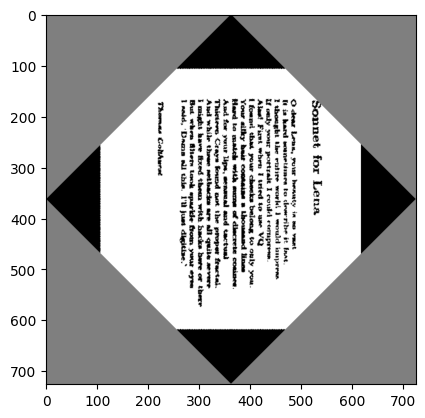

In [8]:
X = rectifyOrientation(sonrot)

plt.gray()
plt.imshow(X)
plt.show()

Text(0.5, 1.0, '215 degree')

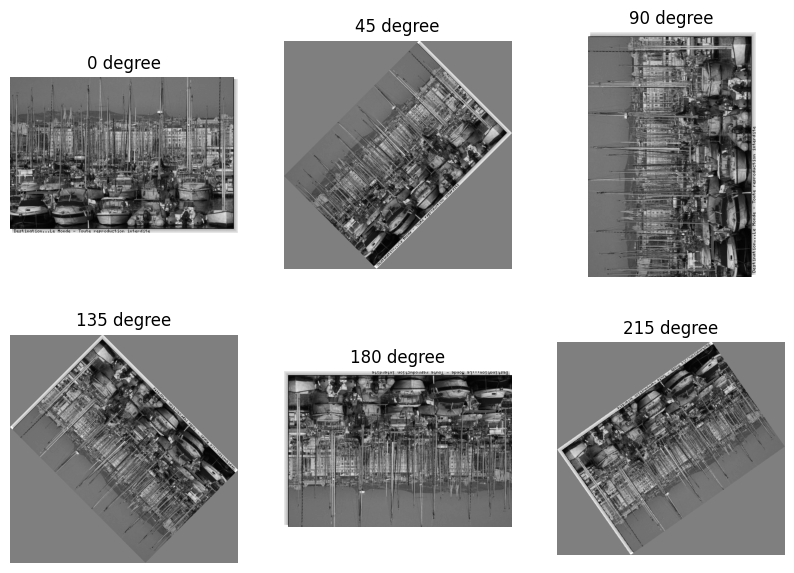

In [9]:
port = np.array(Image.open("img/port.jpg"))
Port1 = rotateImage(port, 0)
Port2 = rotateImage(port, 45)
Port3 = rotateImage(port, 90)
Port4 = rotateImage(port, 135)
Port5 = rotateImage(port, 180)
Port6 = rotateImage(port, 215)

fig = plt.figure(figsize=(10, 7)) 
  
# setting values to rows and column variables 
rows = 2
columns = 3

# Adds a subplot at the 1st position 
fig.add_subplot(rows, columns, 1) 
  
# showing image 
plt.imshow(Port1) 
plt.axis('off') 
plt.title("0 degree") 
  
# Adds a subplot at the 2nd position 
fig.add_subplot(rows, columns, 2) 
  
# showing image 
plt.imshow(Port2) 
plt.axis('off') 
plt.title("45 degree") 
  
# Adds a subplot at the 3rd position 
fig.add_subplot(rows, columns, 3) 
  
# showing image 
plt.imshow(Port3) 
plt.axis('off') 
plt.title("90 degree") 
  
# Adds a subplot at the 4th position 
fig.add_subplot(rows, columns, 4) 
  
# showing image 
plt.imshow(Port4) 
plt.axis('off') 
plt.title("135 degree") 

# Adds a subplot at the 5st position 
fig.add_subplot(rows, columns, 5) 
  
# showing image 
plt.imshow(Port5) 
plt.axis('off') 
plt.title("180 degree") 
  
# Adds a subplot at the 6nd position 
fig.add_subplot(rows, columns, 6) 
  
# showing image 
plt.imshow(Port6) 
plt.axis('off') 
plt.title("215 degree") 
